# PART 1:  Identification and classification of plant  images into 12  categories.

In [3]:
  !pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 3.9MB/s 


In [4]:

from google.colab import drive 
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [6]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import load_model
from sklearn.linear_model import  LogisticRegression,LinearRegression
from sklearn.svm import  SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import  Dense, BatchNormalization,Dropout, Convolution2D,Activation,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.optimizers import  Adam, SGD
from tensorflow.keras.models import  Sequential
import tensorflow
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.regularizers import L2
from keras.preprocessing import image
from tensorflow.keras.initializers import GlorotNormal,GlorotUniform,HeNormal,HeUniform
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import kerastuner as kt
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [8]:
%cd /content/drive/MyDrive/GL\ Assignment/Convolutional\ Neural\ network

/content/drive/MyDrive/GL Assignment/Convolutional Neural network


## 1. Import the data. Analyse the dimensions of the data. Visualise the data.

##### ImageDataGenerator is keras library that will provides data augmentation.

In [9]:
idg = tensorflow.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.30
)

In [10]:
train_gen = idg.flow_from_directory('train',
                                      target_size=(180, 180),
                                      subset='training',
                                      class_mode='categorical',
                                      batch_size=16,
                                      shuffle=True,
                                      seed=9
                                      )

Found 3342 images belonging to 12 classes.


In [11]:
val_gen = idg.flow_from_directory('train',
                                    target_size=(180, 180),                                                   
                                    subset='validation',
                                    class_mode='categorical',
                                    batch_size=16,
                                    shuffle=True,
                                    seed=1
                                )

Found 1425 images belonging to 12 classes.


In [12]:
xtrain,ytrain= next(train_gen)

In [13]:
print("Shape of training variables:",xtrain.shape)
print("Shape of training target variable:",ytrain.shape)

Shape of training variables: (16, 180, 180, 3)
Shape of training target variable: (16, 12)


In [14]:
xtest,ytest=next(val_gen)

In [15]:
print("Shape of test variables:",xtest.shape)
print("Shape of test target variable:",ytest.shape)

Shape of test variables: (16, 180, 180, 3)
Shape of test target variable: (16, 12)


Label of plant: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


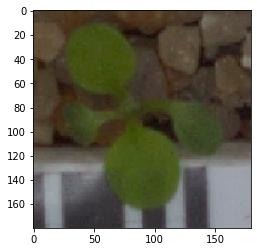

Label of plant: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


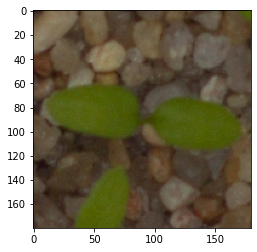

Label of plant: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


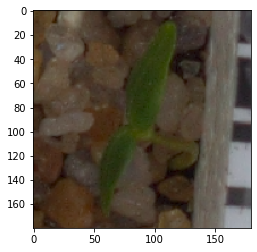

Label of plant: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


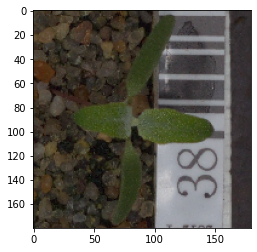

In [16]:
#Print label vs their images for 5 records.
for i in range(1,5):
  print("Label of plant:",ytrain[i])
  plt.imshow(xtrain[i])
  plt.show()

## 2. Train tune and test AIML image classifier model using:


*  Use supervised learning algorithms for training
*  Use neural networks for training
*  Use CNN for training





In [46]:
#Import entire dataset for supervised and neural networks
trainGenNN = idg.flow_from_directory('train',
                                      target_size=(180, 180),
                                      subset='training',
                                      class_mode='categorical',
                                      batch_size=32,
                                      shuffle=True,
                                      seed=123
                                      )
valGenNN = idg.flow_from_directory('train',
                                    target_size=(180, 180),                                                   
                                    subset='validation',
                                    class_mode='categorical',
                                    batch_size=5000,
                                    shuffle=32,
                                    seed=123
                                )

Found 3342 images belonging to 12 classes.
Found 1425 images belonging to 12 classes.


In [47]:
xTrainNN,yTrainNN= next(trainGenNN)
xtestNN,ytestNN=next(valGenNN)

In [23]:
train_gen_NN = idg.flow_from_directory('train',
                                      target_size=(180, 180),
                                      subset='training',
                                      class_mode='sparse',
                                      batch_size=5000,
                                      shuffle=True,
                                      seed=123
                                      )


Found 3342 images belonging to 12 classes.


In [24]:
val_gen_NN = idg.flow_from_directory('train',
                                    target_size=(180, 180),                                                   
                                    subset='validation',
                                    class_mode='sparse',
                                    batch_size=5000,
                                    shuffle=True,
                                    seed=123
                                )

Found 1425 images belonging to 12 classes.


In [25]:
xtrain_NN,ytrain_NN= next(train_gen_NN)
xtest_NN,ytest_NN=next(val_gen_NN)

In [26]:
print("Shape of training variables:",xtrain_NN.shape)
print("Shape of training target variable:",ytrain_NN.shape)
print("Shape of test variables:",xtest_NN.shape)
print("Shape of test target variable:",ytest_NN.shape)

Shape of training variables: (3342, 180, 180, 3)
Shape of training target variable: (3342,)
Shape of test variables: (1425, 180, 180, 3)
Shape of test target variable: (1425,)


### 2.1 Supervised learning algorithm


In [27]:
X_train_shaped=xtrain_NN.reshape(3342,97200)
X_test_shaped=xtest_NN.reshape(1425,97200)

In [ ]:
#We will perform Scaling and dimensionality reduction.
scale = StandardScaler()
plantSeedTrain = scale.fit_transform(X_train_shaped)
plantSeedTest = scale.fit_transform(X_test_shaped)


In [ ]:
pca = PCA(n_components=100)
plantSeedTrain_PCA = pca.fit_transform(plantSeedTrain)
plantSeedTest_PCA = pca.fit_transform(plantSeedTest)
print('PCA  shape for train ds is: ', plantSeedTrain_PCA.shape)
print('PCA  shape for test ds is: ', plantSeedTest_PCA.shape)

PCA  shape for train ds is:  (3342, 100)
PCA  shape for test ds is:  (1425, 100)


In [ ]:
#SVM classifier using hyperparameter tuning

In [ ]:
tuned_parameters =dict(C=[1,10,100,1000],kernel=['rbf'])

In [ ]:
clf = GridSearchCV(SVC(), tuned_parameters, verbose = 3)
clf.fit(plantSeedTrain_PCA,ytrain_NN)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.441, total=   2.3s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.483, total=   2.3s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.454, total=   2.3s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.466, total=   2.3s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.475, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.496, total=   2.6s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.520, total=   2.6s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.488, total=   2.7s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.475, total=   2.6s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   51.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
results=clf.cv_results_
results

{'mean_fit_time': array([1.98403192, 2.31407485, 2.34801092, 2.34277244]),
 'mean_score_time': array([0.33125381, 0.32092228, 0.32620277, 0.32106838]),
 'mean_test_score': array([0.46349588, 0.49251005, 0.47725088, 0.47695148]),
 'param_C': masked_array(data=[1, 10, 100, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 100, 'kernel': 'rbf'},
  {'C': 1000, 'kernel': 'rbf'}],
 'rank_test_score': array([4, 1, 2, 3], dtype=int32),
 'split0_test_score': array([0.44095665, 0.49626308, 0.46487294, 0.46487294]),
 'split1_test_score': array([0.48281016, 0.52017937, 0.51718984, 0.51718984]),
 'split2_test_score': array([0.45359281, 0.48802395, 0.47005988, 0.47005988]),
 'split3_test_score': array([0

In [ ]:
clf.best_score_

0.49251004717023356

In [ ]:
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
pred_train= clf.predict(plantSeedTrain_PCA)
pred= clf.predict(plantSeedTest_PCA)

    

In [ ]:
print("Mean score for SVC using randomised hyperaparameter search : ",np.mean(results['mean_test_score']))

Mean score for SVC using randomised hyperaparameter search :  0.4775520707463995


In [ ]:
#We will add few more cross-validation rounds to increase the accuracy

In [ ]:
linearsvc=SVC(C=10,decision_function_shape='ovr',kernel='rbf')
scores=cross_val_score(clf,plantSeedTrain_PCA,ytrain_NN,cv=15)
scores


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.457, total=   2.1s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.479, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.465, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.449, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.477, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.479, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.482, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.479, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.463, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.3s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.484, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.462, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.468, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.452, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.477, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.508, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.486, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.489, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.463, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.1s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.454, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.473, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.473, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.465, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.478, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.478, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.478, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.486, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.463, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.4s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.438, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.468, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.468, total=   2.1s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.458, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.488, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.482, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.481, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.490, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.471, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   47.6s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.436, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.463, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.465, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.441, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.474, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.502, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.481, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.482, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.460, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.4s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.442, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.452, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.468, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.447, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.493, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.478, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.481, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.487, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.449, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.447, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.486, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.487, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.466, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.490, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.487, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.529, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.492, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.458, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.4s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.438, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.487, total=   2.1s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.465, total=   2.1s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.447, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.490, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.494, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.522, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.458, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.458, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.4s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.439, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.492, total=   2.1s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.441, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.458, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.485, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.473, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.521, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.466, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.484, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.3s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.436, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.486, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.431, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.478, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.483, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.489, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.529, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.479, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.494, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.0s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.426, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.492, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.433, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.479, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.474, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.490, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.535, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.476, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.492, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.3s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.447, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.500, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.436, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.478, total=   2.1s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.472, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.471, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.529, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.458, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.481, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.6s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.442, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.486, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.428, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.471, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.474, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.494, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.508, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.481, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.468, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.3s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.438, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.479, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.436, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.463, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.471, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.471, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.519, total=   2.4s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.473, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.481, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.4s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, kernel=rbf, score=0.441, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.476, total=   2.0s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] ..................... C=1, kernel=rbf, score=0.423, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.479, total=   2.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.484, total=   2.0s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.487, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.521, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.439, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .................... C=10, kernel=rbf, score=0.476, total=   2.3s
[CV] C=10, kernel=rbf ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.2s finished


array([0.52914798, 0.4529148 , 0.5470852 , 0.53363229, 0.52017937,
       0.5426009 , 0.4573991 , 0.47982063, 0.53811659, 0.47085202,
       0.47982063, 0.53811659, 0.50900901, 0.50900901, 0.5       ])

In [ ]:
linearsvc=SVC(C=10,decision_function_shape='ovr',kernel='rbf')
scores=cross_val_score(linearsvc,plantSeedTrain_PCA,ytrain_NN,cv=15)
scores

array([0.52914798, 0.4529148 , 0.5470852 , 0.53363229, 0.52017937,
       0.5426009 , 0.4573991 , 0.47982063, 0.53811659, 0.47085202,
       0.47982063, 0.53811659, 0.50900901, 0.50900901, 0.5       ])

In [ ]:
#Accuracy of SVM classifier 
np.mean(scores)

0.5071802744448485

### 2.2 Train and tune a Neural Network .

In [28]:
#OneHot encoding of target variables to feed to ANN.
ytrain_NN_enc = tensorflow.keras.utils.to_categorical(ytrain_NN,num_classes=12)
ytest_NN_enc = tensorflow.keras.utils.to_categorical(ytest_NN,num_classes=12)

In [65]:
def build_NNmodel(hp):  
  model=Sequential()
  for i in range(hp.Int('num_layers', 2, 20)):
    model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    
  model.add(Dense(12, activation='softmax'))
  model.compile(optimizer=SGD(hp.Choice('learning_rate', values=[ 1E-2, 1E-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [66]:
tuner_search=RandomSearch(build_NNmodel,objective='accuracy',max_trials=5,directory='output32',project_name="PlantNN")

In [67]:
tuner_search.search(X_train_shaped,ytrain_NN_enc,epochs=20,validation_data=(X_test_shaped,ytest_NN_enc))

Trial 5 Complete [00h 07m 52s]
accuracy: 0.3461998701095581

Best accuracy So Far: 0.37791740894317627
Total elapsed time: 00h 25m 54s
INFO:tensorflow:Oracle triggered exit


In [82]:
tuner_search.results_summary()

Results summary
Results in output32/PlantNN
Showing 10 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 320
units_1: 32
learning_rate: 0.01
units_2: 384
units_3: 256
units_4: 416
units_5: 160
units_6: 384
units_7: 448
units_8: 96
units_9: 64
units_10: 480
units_11: 352
units_12: 224
Score: 0.37791740894317627
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 128
learning_rate: 0.01
units_2: 288
units_3: 32
units_4: 96
units_5: 288
units_6: 224
units_7: 352
units_8: 448
units_9: 128
units_10: 64
units_11: 448
units_12: 480
Score: 0.37073609232902527
Trial summary
Hyperparameters:
num_layers: 8
units_0: 448
units_1: 256
learning_rate: 0.01
units_2: 512
units_3: 416
units_4: 224
units_5: 224
units_6: 288
units_7: 448
units_8: 96
units_9: 192
units_10: 288
units_11: 288
units_12: 416
Score: 0.3461998701095581
Trial summary
Hyperparameters:
num_layers: 13
units_0: 256
units_1: 480
learning_rate: 0.01
units_2: 32
u

##### From above results summary, highest accuracy is obtained when there are more layers with more neurons in each layer. We will retrain above best obtained model.

In [68]:
model = tuner_search.get_best_models(num_models=1)[0]

In [73]:
model.fit(X_train_shaped,ytrain_NN_enc,epochs=50,validation_data=(X_test_shaped,ytest_NN_enc))

Epoch 1/50
105/105 [==============================] - 15s 147ms/step - loss: 0.0675 - accuracy: 0.9853 - val_loss: 2.0577 - val_accuracy: 0.5579
Epoch 2/50
105/105 [==============================] - 15s 146ms/step - loss: 0.0409 - accuracy: 0.9940 - val_loss: 2.0522 - val_accuracy: 0.5495
Epoch 3/50
105/105 [==============================] - 15s 146ms/step - loss: 0.0411 - accuracy: 0.9916 - val_loss: 2.5701 - val_accuracy: 0.5074
Epoch 4/50
105/105 [==============================] - 15s 146ms/step - loss: 0.5228 - accuracy: 0.8549 - val_loss: 3.7642 - val_accuracy: 0.2021
Epoch 5/50
105/105 [==============================] - 15s 145ms/step - loss: 0.3109 - accuracy: 0.9060 - val_loss: 1.9473 - val_accuracy: 0.5277
Epoch 6/50
105/105 [==============================] - 15s 144ms/step - loss: 0.0522 - accuracy: 0.9892 - val_loss: 2.0010 - val_accuracy: 0.5453
Epoch 7/50
105/105 [==============================] - 15s 144ms/step - loss: 0.0414 - accuracy: 0.9937 - val_loss: 2.0454 - val_ac

In [75]:
model.evaluate(X_test_shaped,ytest_NN_enc)

45/45 [==============================] - 2s 54ms/step - loss: 2.2301 - accuracy: 0.5474


[2.230111598968506, 0.5473684072494507]

In [77]:
pred=np.argmax(model.predict(X_test_shaped),axis=-1)

In [81]:
for i in range(100,110):
  print("\nPredcited value",pred[i])
  print("Actual label",ytest_NN[i])
 


 Predcited value 6
Actual label 4.0

 Predcited value 8
Actual label 3.0

 Predcited value 8
Actual label 2.0

 Predcited value 11
Actual label 11.0

 Predcited value 6
Actual label 8.0

 Predcited value 2
Actual label 2.0

 Predcited value 8
Actual label 1.0

 Predcited value 3
Actual label 8.0

 Predcited value 8
Actual label 9.0

 Predcited value 8
Actual label 8.0


In [ ]:
#3 out 10 predictions are correct for our neural network model.

### 2.3  CNN

In [ ]:
checkpoint = tensorflow.keras.callbacks.ModelCheckpoint('plant_classifier.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose = 1)

In [ ]:
modelPlantCNN =Sequential()
modelPlantCNN.add(tensorflow.keras.layers.InputLayer(input_shape=(180,180,3,)))
modelPlantCNN.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
modelPlantCNN.add(MaxPool2D(pool_size = (2,2)))
modelPlantCNN.add(BatchNormalization())
modelPlantCNN.add(Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))
modelPlantCNN.add(MaxPool2D(pool_size = (2,2)))
modelPlantCNN.add(BatchNormalization())
modelPlantCNN.add(Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
modelPlantCNN.add(MaxPool2D(pool_size = (2,2)))
modelPlantCNN.add(BatchNormalization())
modelPlantCNN.add(Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
modelPlantCNN.add(MaxPool2D(pool_size = (2,2)))
modelPlantCNN.add(Flatten())
modelPlantCNN.add(Dense(128, activation='relu'))
modelPlantCNN.add(Dropout(0.2))
modelPlantCNN.add(Dense(64, activation='relu'))
modelPlantCNN.add(BatchNormalization())
modelPlantCNN.add(Dense(12, activation='softmax'))
modelPlantCNN.load_weights('plant_classifier.h5')
modelPlantCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = modelPlantCNN.fit(train_gen,
          epochs=20, # Increase number of epochs if you have sufficient hardware
          steps_per_epoch= 3342//32,  # Number of train images // batch_size
          validation_data=val_gen,
          validation_steps = 1425//32, # Number of val images // batch_size
          callbacks = [checkpoint],
          verbose = 1
)

Epoch 1/20
104/104 [==============================] - 741s 7s/step - loss: 0.4411 - accuracy: 0.8482 - val_loss: 0.9391 - val_accuracy: 0.6903

Epoch 00001: val_accuracy improved from -inf to 0.69034, saving model to plant_classifier.h5
Epoch 2/20
104/104 [==============================] - 386s 4s/step - loss: 0.4095 - accuracy: 0.8428 - val_loss: 2.3994 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.69034
Epoch 3/20
104/104 [==============================] - 256s 2s/step - loss: 0.4134 - accuracy: 0.8731 - val_loss: 0.5948 - val_accuracy: 0.7997

Epoch 00003: val_accuracy improved from 0.69034 to 0.79972, saving model to plant_classifier.h5
Epoch 4/20
104/104 [==============================] - 219s 2s/step - loss: 0.3950 - accuracy: 0.8605 - val_loss: 0.9043 - val_accuracy: 0.7244

Epoch 00004: val_accuracy did not improve from 0.79972
Epoch 5/20
104/104 [==============================] - 214s 2s/step - loss: 0.3330 - accuracy: 0.8846 - val_loss: 1.0832 - val

In [ ]:
modelPlantCNN.evaluate(train_gen )

209/209 [==============================] - 121s 577ms/step - loss: 0.1744 - accuracy: 0.9381


[0.17443668842315674, 0.9380610585212708]

In [ ]:
modelPlantCNN.evaluate(val_gen )

90/90 [==============================] - 51s 559ms/step - loss: 0.3617 - accuracy: 0.8933


[0.36170494556427, 0.8933333158493042]

In [ ]:
modelPlantCNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 89, 89, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 43, 43, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       7

In [ ]:
%cd /content/drive/MyDrive/GL Assignment/Convolutional Neural network/

/content/drive/MyDrive/GL Assignment/Convolutional Neural network


In [83]:
xtestCNN,ytestCNN=next(val_gen)

In [86]:
modelPlantCNN=load_model('plant_classifier.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predcited value 4
Actual label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Common wheat


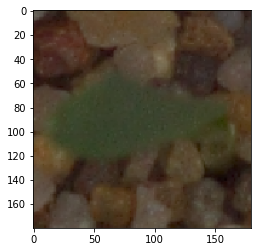

Predcited value 3
Actual label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Common Chickweed


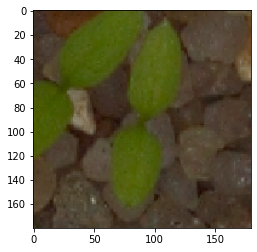

Predcited value 3
Actual label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Common Chickweed


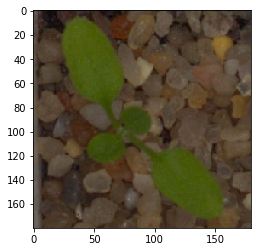

Predcited value 11
Actual label [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Sugar beet


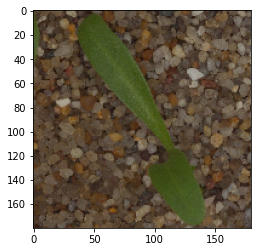

Predcited value 4
Actual label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Common wheat


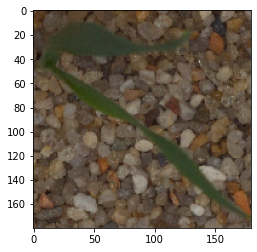

Predcited value 3
Actual label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Common Chickweed


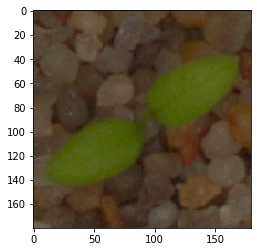

Predcited value 5
Actual label [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Fat Hen


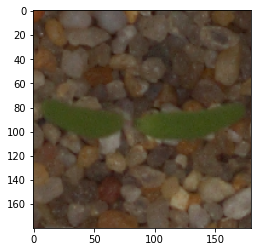

Predcited value 8
Actual label [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Scentless Mayweed


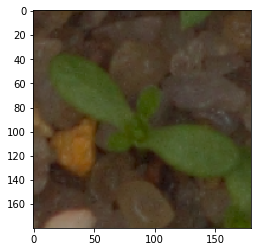

Predcited value 1
Actual label [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Charlock


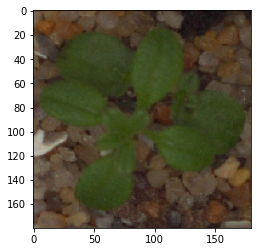

Predcited value 8
Actual label [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Scentless Mayweed


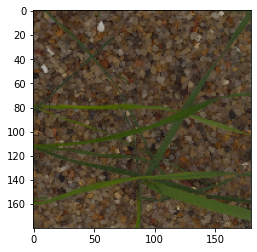

In [87]:
pred=modelPlantCNN.predict_classes(xtestCNN)
for i in range(5,15):
  print("Predcited value",pred[i])
  print("Actual label",ytestCNN[i])
  predictions = labels[pred[i]]
  #predictions = plantLabels[predictPlant[0]] 
  print(predictions)
  plt.imshow(xtestCNN[i])
  plt.show()

In [ ]:
# 8 out of 10 predictions for our trained CNN model appears to be correct.

## 3. Compare the results from the above step along with your detailed observations

Accuracies for the above models are as follows:

1. Supervised learning using SVM : 50.7
2. Neural Network : 54.7
3. Convolutional Neural Network:  89.33

Observations/Conclusions:

We can observe that CNN has the highest performance whereas SVM supervised learning model has the lowest.
1. For supervised learning, dataset with large dimensions tend to give average accuracy rate. This can be improved by using dimensionality reduction techniques like PCA and hyperparameter tuning to get best results.
2. To train Neural Network and obtain results, it has to be trained with mutliple sets of parameters like dropout rate, learning rate, weight initialisers , regularisers, number of layers, number of neurons per layer.
3. CNN becomes quite the efficient algorithm and predicts correctly for most of the time. The size of kernel, number of kernels , number of layers, learning rate are the important hyperparameters along with MaxPooling layer contribute in the efficient performance of this network.



## 4. Pickle the best performing model

In [ ]:
modelPlantCNN.save("plant_classifier.h5")

## 5. Import the the image in the “ Prediction” folder to predict the class.Display the image. Use the best trained image classifier model to predict the class.

In [ ]:
%cd /content/drive/MyDrive/GL Assignment/Convolutional Neural network/

/content/drive/MyDrive/GL Assignment/Convolutional Neural network


In [88]:
download = drive.CreateFile({'id': '1ENDNwALMS1vRj9c_GGJ01H9yUOL2V_4L'})
download.GetContentFile('Seedling-Prediction.zip')
!unzip Seedling-Prediction.zip

Archive:  Seedling-Prediction.zip
replace Seedling - Prediction/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: Na


In [ ]:
!pwd

/content/drive/My Drive/GL Assignment/Convolutional Neural network


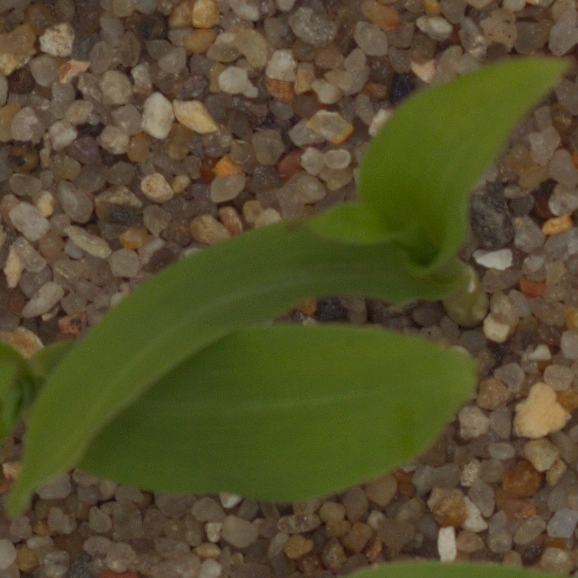

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
plantImg = cv2.imread('Seedling - Prediction/Predict.png') 
cv2_imshow(plantImg)

In [ ]:
#Resize the image read from directory to fit to our CNN model input image size requirement
resized = cv2.resize(plantImg, (180,180), interpolation=cv2.INTER_AREA)  
plantImg = np.reshape(resized,[1,180,180,3])
plantImg.shape

(1, 180, 180, 3)

In [ ]:
#PRediction for the image
predictPlant =model2.predict_classes(plantImg)
predictPlant

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])

In [ ]:
#Print the labels 
plantLabels = (train_gen.class_indices)
plantLabels = dict((v,k) for k,v in plantLabels.items())
plantLabels

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [ ]:

predictions = plantLabels[predictPlant[0]] 
predictions

'Maize'

# PART 2: Explain in depth why CNN out performs neural networks which in turn out perform supervised learning models when it comes to image classification

Out of the models trained above we can observe that CNN performs the best. This is because of the following reasons:
1. Multiple filters/kernels are  trained during model training that are able to recognise image features and turn them to feature maps. 
2. Convolutions are applied on local neighbourhood pixels by the kernel. This promotes correlation between the neighbours. In such case the network will be able to classify image even if the location of the object is changed.
3.Layers such as Maxpooling helps in downsclaing the dimensions of the image set keeping the significant features of image intact.
 
In case of Neural network, the performance is lesser than that of CNN because each feature of the image has to be explicitly sent as input parameter during training. It significantly increases the number of parameters and weights training becomes expensive.

Out of all Supervised learning models , SVM performs best because it used kernel trick for classification. But feature extraction from such a large dataset becomes quite inaccurate. 